<a href="https://colab.research.google.com/github/AyusheeMittal/legendary-guide/blob/master/fellowship.ai/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import fastai
from fastai import *
from fastai.text import * 
import pandas as pd
import numpy as np
from functools import partial
import io
import os


In [2]:
IS_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if IS_CUDA else "cpu")

In [3]:
! wget https://s3.amazonaws.com/fast-ai-nlp/dbpedia_csv.tgz

--2021-02-08 15:56:48--  https://s3.amazonaws.com/fast-ai-nlp/dbpedia_csv.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.109.174
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.109.174|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68341743 (65M) [application/x-tar]
Saving to: ‘dbpedia_csv.tgz’

dbpedia_csv.tgz     100%[===================>]  65.17M  28.1MB/s    in 2.3s    

2021-02-08 15:56:50 (28.1 MB/s) - ‘dbpedia_csv.tgz’ saved [68341743/68341743]



In [4]:
mkdir dataset

In [5]:
!tar -xvf  'dbpedia_csv.tgz' -C dataset

dbpedia_csv/
dbpedia_csv/train.csv
dbpedia_csv/readme.txt
dbpedia_csv/test.csv
dbpedia_csv/classes.txt


In [6]:
train_df = pd.read_csv('dataset/dbpedia_csv/train.csv')
test_df = pd.read_csv('dataset/dbpedia_csv/test.csv')
classes = pd.read_csv('dataset/dbpedia_csv/classes.txt')

In [7]:
len(train_df), len(test_df), len(classes)

(559999, 69999, 13)

In [8]:
train_df.head()

,1,E. D. Abbott Ltd,Abbott of Farnham E D Abbott Limited was a British coachbuilding business based in Farnham Surrey trading under that name from 1929. A major part of their output was under sub-contract to motor vehicle manufacturers. Their business closed in 1972.
0,1,Schwan-Stabilo,Schwan-STABILO is a German maker of pens for ...
1,1,Q-workshop,Q-workshop is a Polish company located in Poz...
2,1,Marvell Software Solutions Israel,Marvell Software Solutions Israel known as RA...
3,1,Bergan Mercy Medical Center,Bergan Mercy Medical Center is a hospital loc...
4,1,The Unsigned Guide,The Unsigned Guide is an online contacts dire...


In [9]:
test_df.head()

,1,TY KU,TY KU /taɪkuː/ is an American alcoholic beverage company that specializes in sake and other spirits. The privately-held company was founded in 2004 and is headquartered in New York City New York. While based in New York TY KU's beverages are made in Japan through a joint venture with two sake breweries. Since 2011 TY KU's growth has extended its products into all 50 states.
0,1,Odd Lot Entertainment,OddLot Entertainment founded in 2001 by longt...
1,1,Henkel,Henkel AG & Company KGaA operates worldwide w...
2,1,GOAT Store,The GOAT Store (Games Of All Type Store) LLC ...
3,1,RagWing Aircraft Designs,RagWing Aircraft Designs (also called the Rag...
4,1,Pošte Srpske,Pošte Srpske is one of three companies respon...


In [10]:
train_df.columns = ['labels', 'heading', 'text']
test_df.columns = ['labels', 'heading', 'text']

In [11]:
train_df['labels'].value_counts()

14    40000
13    40000
12    40000
11    40000
10    40000
9     40000
8     40000
7     40000
6     40000
5     40000
4     40000
3     40000
2     40000
1     39999
Name: labels, dtype: int64

In [12]:
train_df.head()

,labels,heading,text
0,1,Schwan-Stabilo,Schwan-STABILO is a German maker of pens for ...
1,1,Q-workshop,Q-workshop is a Polish company located in Poz...
2,1,Marvell Software Solutions Israel,Marvell Software Solutions Israel known as RA...
3,1,Bergan Mercy Medical Center,Bergan Mercy Medical Center is a hospital loc...
4,1,The Unsigned Guide,The Unsigned Guide is an online contacts dire...


In [13]:
test_df['labels'].value_counts()

14    5000
13    5000
12    5000
11    5000
10    5000
9     5000
8     5000
7     5000
6     5000
5     5000
4     5000
3     5000
2     5000
1     4999
Name: labels, dtype: int64

In [14]:
test_df.head()

,labels,heading,text
0,1,Odd Lot Entertainment,OddLot Entertainment founded in 2001 by longt...
1,1,Henkel,Henkel AG & Company KGaA operates worldwide w...
2,1,GOAT Store,The GOAT Store (Games Of All Type Store) LLC ...
3,1,RagWing Aircraft Designs,RagWing Aircraft Designs (also called the Rag...
4,1,Pošte Srpske,Pošte Srpske is one of three companies respon...


In [15]:
classes

,Company
0,EducationalInstitution
1,Artist
2,Athlete
3,OfficeHolder
4,MeanOfTransportation
5,Building
6,NaturalPlace
7,Village
8,Animal
9,Plant


In [17]:
df = pd.DataFrame({'label': train_df['labels'], 'text': train_df['text']})
df.head()

,label,text
0,1,Schwan-STABILO is a German maker of pens for ...
1,1,Q-workshop is a Polish company located in Poz...
2,1,Marvell Software Solutions Israel known as RA...
3,1,Bergan Mercy Medical Center is a hospital loc...
4,1,The Unsigned Guide is an online contacts dire...


In [18]:
df_test = pd.DataFrame({'label': test_df['labels'], 'text': test_df['text']})
df_test.head()

,label,text
0,1,OddLot Entertainment founded in 2001 by longt...
1,1,Henkel AG & Company KGaA operates worldwide w...
2,1,The GOAT Store (Games Of All Type Store) LLC ...
3,1,RagWing Aircraft Designs (also called the Rag...
4,1,Pošte Srpske is one of three companies respon...


In [19]:
import nltk
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
# tokenization 
tokenized_doc = df['text'].apply(lambda x: x.split())

# remove stop-words 
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

# de-tokenization 
detokenized_doc = [] 
for i in range(len(df)): 
    t = ' '.join(tokenized_doc[i]) 
    detokenized_doc.append(t) 

df['text'] = detokenized_doc
df['text']

0         Schwan-STABILO German maker pens writing colou...
1         Q-workshop Polish company located Poznań speci...
2         Marvell Software Solutions Israel known RADLAN...
3         Bergan Mercy Medical Center hospital located O...
4         The Unsigned Guide online contacts directory c...
                                ...                        
559994    Barking Essex Black comedy play directed Harry...
559995    Science & Spirit discontinued American bimonth...
559996    The Blithedale Romance (1852) Nathaniel Hawtho...
559997    Razadarit Ayedawbon (Burmese: ရာဇာဓိရာဇ် အရေးတ...
559998    Vinyl Cafe Notebooks: collection essays The Vi...
Name: text, Length: 559999, dtype: object

In [21]:
# tokenization 
tokenized_doc = df_test['text'].apply(lambda x: x.split())

# remove stop-words 
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

# de-tokenization 
detokenized_doc = [] 
for i in range(len(df_test)): 
    t = ' '.join(tokenized_doc[i]) 
    detokenized_doc.append(t) 

df_test['text'] = detokenized_doc
df_test['text']

0        OddLot Entertainment founded 2001 longtime pro...
1        Henkel AG & Company KGaA operates worldwide le...
2        The GOAT Store (Games Of All Type Store) LLC o...
3        RagWing Aircraft Designs (also called RagWing ...
4        Pošte Srpske one three companies responsible p...
                               ...                        
69994    Energy Victory: Winning War Terror Breaking Fr...
69995    Bestiario book 8 short stories written Julio C...
69996    Wuthering Heights novel Emily Brontë written O...
69997    L'Indépendant newspaper published Luxembourg 1...
69998    The Prophecy fifth novel New York Times bestse...
Name: text, Length: 69999, dtype: object

In [22]:
from fastai.utils import show_install

In [23]:
data_lm = TextLMDataBunch.from_df(path="", train_df = df, valid_df = df_test)

/usr/local/lib/python3.6/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [24]:
data_clas = TextClasDataBunch.from_df(path = "", train_df = df, valid_df = df_test, vocab=data_lm.train_ds.vocab, bs=32)

/usr/local/lib/python3.6/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [25]:
learn = language_model_learner(data_lm, AWD_LSTM, pretrained=True, drop_mult=0.5)

In [26]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.91E-02
Min loss divided by 10: 1.74E-02


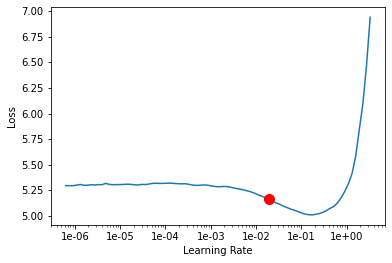

In [27]:
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

In [28]:
learn.fit_one_cycle(2, min_grad_lr)

epoch,train_loss,valid_loss,accuracy,time
0,3.764533,3.482063,0.454287,25:22
1,3.425999,3.211849,0.477919,25:24


In [29]:
df.shape, df_test.shape

((559999, 2), (69999, 2))

In [30]:
learn.save_encoder('ft_enc')

In [31]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.7)
learn.load_encoder('ft_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (559999 items)
x: TextList
xxbos xxmaj xxunk - xxup xxunk xxmaj german maker pens writing colouring cosmetics well markers xxunk office use . xxmaj it world 's largest manufacturer xxunk pens xxmaj xxunk xxmaj boss .,xxbos q - workshop xxmaj polish company located xxmaj poznań specializes xxunk production xxunk dice dice accessories use various games ( role - playing xxunk games tabletop wargames ) . xxmaj they also run online retail store xxunk active forum community . q - workshop established 2001 xxmaj xxunk xxmaj xxunk – student xxmaj poznań . xxmaj xxunk company sold products via online auction services 2005 website online store xxunk .,xxbos xxmaj xxunk xxmaj software xxmaj solutions xxmaj israel known xxup xxunk xxmaj computer xxmaj communications xxmaj limited 2007 wholly owned subsidiary xxmaj xxunk xxmaj technology xxmaj group specializes local area network ( xxup lan ) technologies .,xxbos xxmaj xxunk xxmaj mercy xxmaj med

epoch,train_loss,valid_loss,accuracy,time


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.29E-02
Min loss divided by 10: 3.02E-02


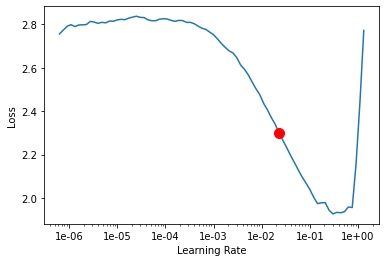

In [32]:
learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

In [34]:
learn.fit_one_cycle(2, min_grad_lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.570367,0.129352,0.958542,09:33
1,0.435452,0.099021,0.968457,09:42


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ar

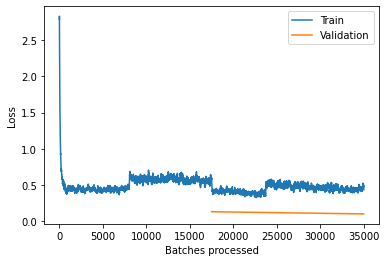

In [35]:
learn.recorder.plot_losses()

In [36]:
# get predictions
preds, targets = learn.get_preds()

predictions = np.argmax(preds, axis = 1)
pd.crosstab(predictions, targets)

col_0,0,1,2,3,4,5,6,7,8,9,10,11,12,13
row_0,,,,,,,,,,,,,,
0,4523,29,24,0,6,23,51,3,0,2,9,5,2,54
1,62,4939,4,1,4,0,118,1,2,0,0,0,0,13
2,25,1,4697,20,48,0,1,0,2,3,0,15,4,21
3,9,0,21,4963,20,0,0,0,0,15,0,1,0,1
4,13,5,120,12,4912,1,10,0,0,0,0,0,1,5
5,104,0,0,0,2,4953,19,2,0,0,2,0,1,3
6,68,18,4,0,4,7,4727,19,22,0,1,0,0,7
7,6,1,0,4,1,10,54,4960,39,11,1,0,1,2
8,5,3,2,0,1,1,14,8,4934,0,0,0,0,1


In [37]:
learn.predict("A power tailgate, standard this year, makes loading cargo easier")

/usr/local/lib/python3.6/dist-packages/fastai/text/data.py:339: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  idx_min = (t != self.pad_idx).nonzero().min()


(Category tensor(5),
 tensor(5),
 tensor([1.2096e-02, 5.1810e-07, 6.4906e-07, 1.2402e-07, 9.7303e-07, 9.8270e-01,
         1.7439e-05, 4.7862e-03, 2.6391e-07, 1.7052e-04, 1.2019e-04, 2.5695e-05,
         4.2969e-05, 4.2745e-05]))